   Apple   Corn   Dill   Eggs  Ice cream  Kidney Beans   Milk  Nutmeg  Onion  \
0  False  False  False   True      False          True   True    True   True   
1  False  False   True   True      False          True  False    True   True   
2   True  False  False   True      False          True   True   False  False   
3  False   True  False  False      False          True   True   False  False   
4  False   True  False   True       True          True  False   False   True   

   Unicorn  Yogurt  
0    False    True  
1    False    True  
2    False   False  
3     True    True  
4    False   False  
    support                     itemsets
0       0.8                       (Eggs)
1       1.0               (Kidney Beans)
2       0.6                       (Milk)
3       0.6                      (Onion)
4       0.6                     (Yogurt)
5       0.8         (Eggs, Kidney Beans)
6       0.6                (Eggs, Onion)
7       0.6         (Kidney Beans, Milk)
8       0.6        (Kidn

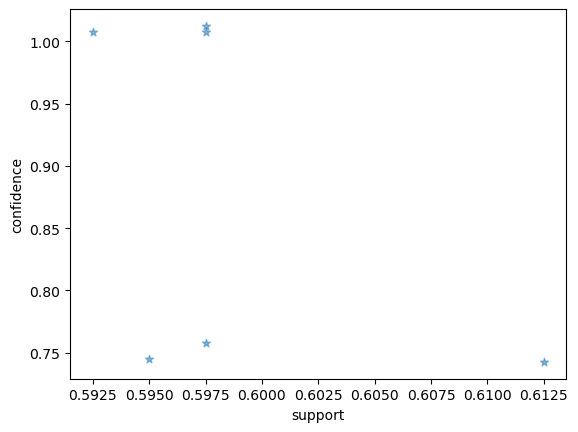

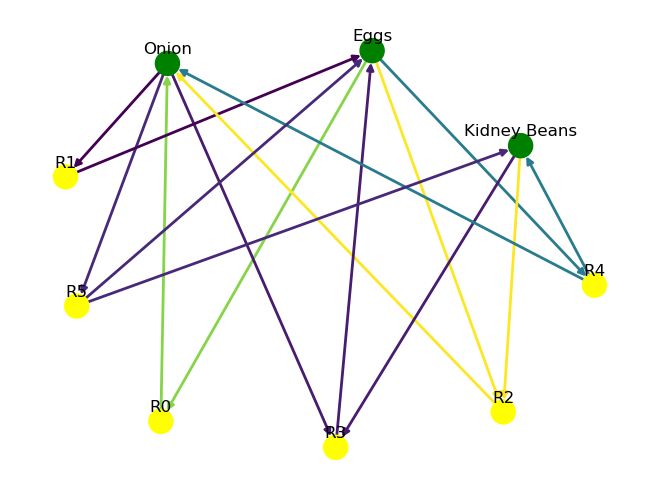

C:\Users\moon\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


                                          antecedents  \
0                        (ALARM CLOCK BAKELIKE GREEN)   
1                         (ALARM CLOCK BAKELIKE PINK)   
2                        (ALARM CLOCK BAKELIKE GREEN)   
3                          (ALARM CLOCK BAKELIKE RED)   
4                          (ALARM CLOCK BAKELIKE RED)   
5                         (ALARM CLOCK BAKELIKE PINK)   
6                              (DOLLY GIRL LUNCH BOX)   
7                                (SPACEBOY LUNCH BOX)   
8                     (PLASTERS IN TIN CIRCUS PARADE)   
9                          (PLASTERS IN TIN SPACEBOY)   
10                    (PLASTERS IN TIN CIRCUS PARADE)   
11                 (PLASTERS IN TIN WOODLAND ANIMALS)   
12                         (PLASTERS IN TIN SPACEBOY)   
13                 (PLASTERS IN TIN WOODLAND ANIMALS)   
14               (SET/20 RED RETROSPOT PAPER NAPKINS)   
15                      (SET/6 RED SPOTTY PAPER CUPS)   
16               (SET/20 RED RE

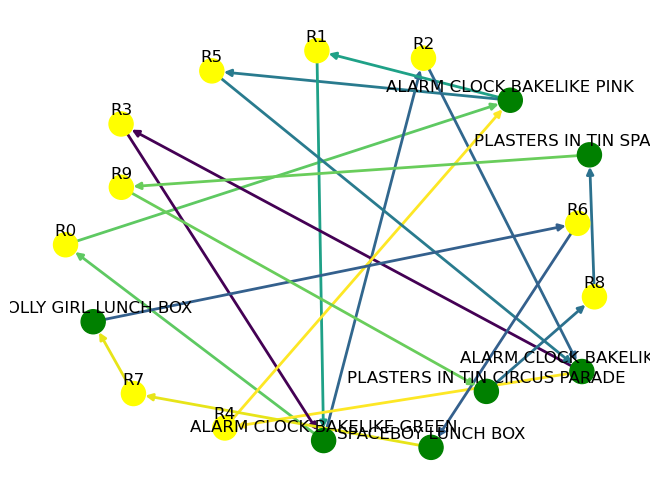

In [11]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]
            
            
import pandas as pd
#from mlxtend.preprocessing import OnehotTransactions
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
 
oht = TransactionEncoder()
oht_ary = oht.fit(dataset).transform(dataset)
df = pd.DataFrame(oht_ary, columns=oht.columns_)
print (df)           
 
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
print (frequent_itemsets)
 
from mlxtend.frequent_patterns import association_rules
 
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
print (rules)
 
support = rules['support'].values
confidence = rules['confidence'].values

 
 
import random
import matplotlib.pyplot as plt
 
 
for i in range (len(support)):
   support[i] = support[i] + 0.0025 * (random.randint(1,10) - 5) 
   confidence[i] = confidence[i] + 0.0025 * (random.randint(1,10) - 5)
 
plt.scatter(support, confidence,   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()
 
import numpy as np
 
def draw_graph(rules, rules_to_show):
  import networkx as nx  
  G1 = nx.DiGraph()
   
  color_map=[]
  N = 50
  colors = np.random.rand(N)    
  strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']   
   
   
  for i in range (rules_to_show):      
    G1.add_nodes_from(["R"+str(i)])
    
     
    for a in rules.iloc[i]['antecedents']:
                
        G1.add_nodes_from([a])
        
        G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)
       
    for c in rules.iloc[i]['consequents']:
             
            G1.add_nodes_from([c])
            
            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)
 
  for node in G1:
       found_a_string = False
       for item in strs: 
           if node==item:
                found_a_string = True
       if found_a_string:
            color_map.append('yellow')
       else:
            color_map.append('green')       
 
 
   
  edges = G1.edges()
  colors = [G1[u][v]['color'] for u,v in edges]
  weights = [G1[u][v]['weight'] for u,v in edges]
 
  pos = nx.spring_layout(G1, k=16, scale=1)
  nx.draw(G1, pos, node_color=color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)
           
   
  for p in pos:  # raise text positions
           pos[p][1] += 0.07
  nx.draw_networkx_labels(G1, pos)
  plt.show()
 
     
draw_graph (rules, 6)   
 
 
df = pd.read_excel('http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx')
 
 
df['Description'] = df['Description'].str.strip()
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df = df[~df['InvoiceNo'].str.contains('C')]
 
basket = (df[df['Country'] =="France"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
 
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
 
basket_sets = basket.applymap(encode_units)
basket_sets.drop('POSTAGE', inplace=True, axis=1)
 
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)
 
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()
 
print (rules)
 
 
 
support = rules['support'].values
confidence = rules['confidence'].values

 
import seaborn as sns1
 
for i in range (len(support)):
    support[i] = support[i] 
    confidence[i] = confidence[i] 
     
plt.title('Association Rules')
plt.xlabel('support')
plt.ylabel('confidence')    
sns1.regplot(x=support, y=confidence, fit_reg=False)
 
plt.gcf().clear()
draw_graph (rules, 10)